In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

In [41]:
wymiary = 100

def generowanieDwojki():
    """Generuje losowa liczbe od 0 do 1"""
    x1, x2 = random.randint(0,1), random.randint(0,1)
    return x1, x2


def shamirWizualny(orygialny):
    """Funkcja implementująca algorytm Shamira"""
    obraz1 = np.zeros((wymiary, wymiary * 2), dtype=int)
    obraz2 = np.zeros((wymiary, wymiary * 2), dtype=int)

    for i in range(wymiary):
        for j in range(wymiary):
            bit = orygialny[i, j]
            pattern = random.choice([[1, 0], [0, 1]])

            if bit == 0:
                # Biały: ten sam wzór w obu
                obraz1[i, j*2] = pattern[0]
                obraz1[i, j*2+1] = pattern[1]
                obraz2[i, j*2] = pattern[0]
                obraz2[i, j*2+1] = pattern[1]
            else:
                # Czarny: odwrotny wzór
                obraz1[i, j*2] = pattern[0]
                obraz1[i, j*2+1] = pattern[1]
                obraz2[i, j*2] = pattern[1]
                obraz2[i, j*2+1] = pattern[0]
    return obraz1, obraz2

In [43]:
def wizualizacja(oryginalny, zakodowany1, zakodowany2, odkodowany):
    """Funkcja wizualizująca oryginalny, losowy, zakodowany i odkodowany obraz"""   
    fig, axs = plt.subplots(2, 2)
    axs[0,0].imshow(oryginalny, cmap='gray')
    axs[0,0].set_title('Oryginalny obraz')
    axs[0,0].axis('off')
    axs[0,1].imshow(zakodowany1, cmap='gray')
    axs[0,1].set_title('Zakodowany1 obraz')
    axs[0,1].axis('off')
    axs[1,0].imshow(zakodowany2, cmap='gray')
    axs[1,0].set_title('Zakodowany2 obraz')
    axs[1,0].axis('off')
    axs[1,1].imshow(odkodowany, cmap='gray')
    axs[1,1].set_title('Odkodowany obraz')
    axs[1,1].axis('off')
    plt.show()

In [44]:
def glowna(oryginalny):
    zakodowany1, zakodowany2 = shamirWizualny(oryginalny)
    odkodowany = (zakodowany1 | zakodowany2).astype(int)
    return zakodowany1, zakodowany2, odkodowany

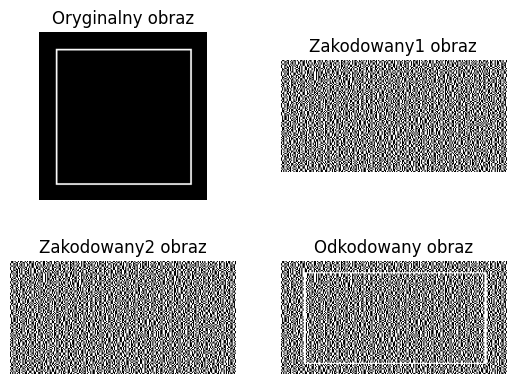

In [45]:
kwadrat = np.zeros((wymiary, wymiary), dtype=int)
kwadrat[10,10:90] = 1 # pozioma linia gora
kwadrat[90,10:90] = 1 # pozioma linia dol
kwadrat[10:90,10] = 1 # pionowa linia lewo
kwadrat[10:91,90] = 1 # pionowa linia prawo

zakodowany1, zakodowany2, odkodowany = glowna(kwadrat)
wizualizacja(kwadrat, zakodowany1, zakodowany2, odkodowany)

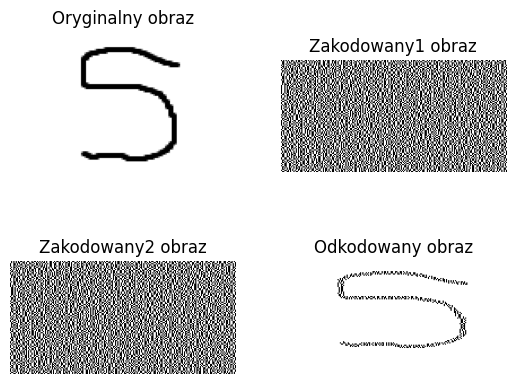

In [46]:
img = Image.open('obrazyWejsciowe/s.png').convert('L')
obraz = np.array(img)

zakodowany1, zakodowany2, odkodowany = glowna(obraz)
wizualizacja(obraz, zakodowany1, zakodowany2, odkodowany)

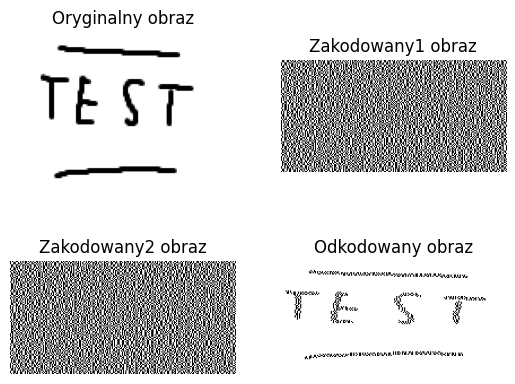

In [47]:
img = Image.open('obrazyWejsciowe/test.png').convert('L')
obraz = np.array(img)

zakodowany1, zakodowany2, odkodowany = glowna(obraz)
wizualizacja(obraz, zakodowany1, zakodowany2, odkodowany)